# Comparing Read/Write Speed

Data comes in all sorts of filetypes. As data scientists, we will be using some HUGE datasets! Gigabytes, for sure. So...what file types make reading and writing GIGABYTES of data easiest?

These are the filetypes we will compare:

* **CSV** - Comma Separated Values - probably the most common filetype. Also comes in other, similar varieties, such as TSV (Tab Separated Values).
* **JSON** - JavaScript Object Notation - pretty readable by humans, and quite useful for NoSQL databases. It is often used for data interchange over the web.
* **XLSX** - Microsoft Excel Open XML Spreadsheet - the standard filetype for Microsoft Excel.
* **Feather** - created by Apache Arrow, this is a very fast and light binary columnar filetype (meaning it reads columns first, instead of rows)
* **Parquet** - also created by Apache, this columnar filetype is designed for use with the Hadoop system.
* **HDF5** - Hierarchical Data Format 5 - this flexible and fast binary filetype is often used for time series data.
* **Pickle** - Python-specific filetype. All sorts of things can be pickled.
* **Avro** - third format from Apache, second one designed for use with the Hadoop framework. This one stores data in a format similar to JSON, but in compact binary files.

All of these except for Avro have simple read and write methods in Pandas. For Avro, we will use the Pandavro package (check it out here: https://github.com/ynqa/pandavro)

We will also have two different data *types*...

* **Numeric** - 2,000 numeric columns with 100,000 rows each
* **Mixed** - 1,000 numeric columns and 1,000 text columns with 100,000 rows

## Import

In [1]:
!pip install pandavro

     |████████████████████████████████| 2.3 MB 14.5 MB/s 
  Created wheel for pandavro: filename=pandavro-1.6.0-py3-none-any.whl size=4568 sha256=b2a956d6ce62c66b23a92535d7540a99f857e01f0259728944ad348cd7fba87a
  Stored in directory: /root/.cache/pip/wheels/18/fe/cf/b377d382387ec5fdbe2bbe8803990d48e57314dd6465e774aa
Successfully built pandavro


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from pathlib import Path

import pandas as pd
import numpy as np
import random
import string
import pandavro

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style('whitegrid')

## Generate Data

Gotta make the DataFrames to save and load.

In [5]:
def generate_data(nrows=100000, numeric_cols=2000, text_cols=0, text_length=10):
  """
  This function generates random data of the indicated size
  """
  synth_string = ''.join([random.choice(string.ascii_letters) for _ in range(text_length)])
  synth_data = pd.concat([pd.DataFrame(np.random.random(size=(nrows, numeric_cols))),
                          pd.DataFrame(np.full(shape=(nrows, text_cols), fill_value=synth_string))],
                         axis = 1, ignore_index=True)
  synth_data.columns = [str(i) for i in synth_data.columns]
  return synth_data

In [6]:
synth_df = generate_data(numeric_cols=1000, text_cols=1000)
synth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 2000 entries, 0 to 1999
dtypes: float64(1000), object(1000)
memory usage: 1.5+ GB


In [7]:
results = {}

## CSV

### Size

In [ ]:
csv_file = Path('test.csv')

In [ ]:
synth_df.to_csv(csv_file)

In [ ]:
size = csv_file.stat().st_size

### Read Time

In [ ]:
%%timeit -o
df_read = pd.read_csv(csv_file)

1 loop, best of 5: 48.1 s per loop


<TimeitResult : 1 loop, best of 5: 48.1 s per loop>

In [ ]:
read = _

In [ ]:
csv_file.unlink()

### Write Time

In [ ]:
%%timeit -o
synth_df.to_csv(csv_file)
csv_file.unlink()

1 loop, best of 5: 3min 29s per loop


<TimeitResult : 1 loop, best of 5: 3min 29s per loop>

In [ ]:
write = _

#### Keep Results

In [ ]:
results['csv'] = {'read':np.mean(read.all_runs), 'write':np.mean(write.all_runs), 'size':size}

## JSON


Colab crashes after using up all of the RAM (30 GB) trying to write the JSON file!!

So...let's just say JSON is too expensive.

## XLSX

Colab also crashed trying to write the XLSX file!

## Feather

### Size

In [ ]:
feather_file = Path('test.feather')

In [ ]:
synth_df.to_feather(feather_file)

In [ ]:
size = feather_file.stat().st_size

### Read Time

In [ ]:
%%timeit -o
df_read = pd.read_feather(feather_file)

1 loop, best of 5: 2.43 s per loop


<TimeitResult : 1 loop, best of 5: 2.43 s per loop>

In [ ]:
read = _

In [ ]:
feather_file.unlink()

### Write Time

In [ ]:
%%timeit -o
synth_df.to_feather(feather_file)
feather_file.unlink()

1 loop, best of 5: 21.3 s per loop


<TimeitResult : 1 loop, best of 5: 21.3 s per loop>

In [ ]:
write = _

### Keep Results

In [ ]:
results['feather'] = {'read':np.mean(read.all_runs), 'write':np.mean(write.all_runs), 'size':size}

## Parquet

### Size

In [15]:
parquet_file = Path('test.parquet')

In [16]:
synth_df.to_parquet(parquet_file)

In [17]:
size = parquet_file.stat().st_size

### Read Time

In [18]:
%%timeit -o
df_read = pd.read_parquet(parquet_file)

1 loop, best of 5: 4.87 s per loop


<TimeitResult : 1 loop, best of 5: 4.87 s per loop>

In [19]:
read = _

In [20]:
parquet_file.unlink()

### Write Time

In [21]:
%%timeit -o
synth_df.to_parquet(parquet_file)
parquet_file.unlink()

1 loop, best of 5: 24.6 s per loop


<TimeitResult : 1 loop, best of 5: 24.6 s per loop>

In [22]:
write = _

### Keep Results

In [23]:
results['parquet'] = {'read':np.mean(read.all_runs), 'write':np.mean(write.all_runs), 'size':size}

## HDF5

HDF5 files can store DataFrames in table format, where multiple DataFrames can be stored in a single file and you can actually read in only the table you want, or Fixed Format, in which the data becomes immutable and must be read in as a whole. We will test both.

## Table Format

### Size

In [ ]:
hdf_file = Path('test.h5')

In [ ]:
synth_df.to_hdf(hdf_file, "table", format="table")

In [ ]:
size = hdf_file.stat().st_size

### Read Time

In [ ]:
%%timeit -o
df_read = pd.read_hdf(hdf_file, "table")

In [ ]:
read = _

In [ ]:
hdf_file.unlink()

### Write Time

In [ ]:
%%timeit -o
synth_df.to_hdf(hdf_file, 'table', format='table')
hdf_file.unlink()

In [ ]:
write = _

### Keep Results

In [ ]:
results['hdf_table'] = {'read':np.mean(read.all_runs), 'write':np.mean(write.all_runs), 'size':size}

## Fixed Format

### Size

In [ ]:
synth_df.to_hdf(hdf_file, 'table', format='fixed')
size = hdf_file.stat().st_size

### Read Time

In [ ]:
%%timeit -o
hdf_df = pd.read_hdf(hdf_file, 'table')

ValueError: ignored

In [ ]:
read = _

In [ ]:
hdf_file.unlink()

### Write Time

In [ ]:
%%timeit -o
with pd.HDFStore(hdf_file) as store:
  store.put('file', synth_df)
hdf_file.unlink()

In [ ]:
write = _

### Keep Results

In [ ]:
results['hdf_fixed'] = {'read':np.mean(read.all_runs), 'write':np.mean(write.all_runs), 'size':size}

## Pickle

### Size

In [ ]:
pickle_file = Path('test.pickle')

In [ ]:
synth_df.to_pickle(pickle_file)
size = pickle_file.stat().st_size

### Read Time

In [ ]:
%%timeit -o
df_read = pd.read_pickle(pickle_file)

1 loop, best of 5: 24.3 s per loop


<TimeitResult : 1 loop, best of 5: 24.3 s per loop>

In [ ]:
read = _

In [ ]:
pickle_file.unlink()

### Write Time

In [ ]:
%%timeit -o
synth_df.to_pickle(pickle_file)
pickle_file.unlink()

1 loop, best of 5: 1min 17s per loop


<TimeitResult : 1 loop, best of 5: 1min 17s per loop>

In [ ]:
write = _

### Keep Results

In [ ]:
results['pickle'] = {'read':np.mean(read.all_runs), 'write':np.mean(write.all_runs), 'size':size}

## Avro

Avro crashed the session by using too much RAM!

In [24]:
results

{'csv': {'read': 49.266218090200155,
  'size': 3027582216.0,
  'write': 213.1501547094},
 'feather': {'read': 2.5164044364002622,
  'size': 1205214418.0,
  'write': 22.267469402799907},
 'parquet': {'read': 5.0409640728,
  'size': 1013993442,
  'write': 25.167232936999994},
 'pickle': {'read': 26.765841926400018,
  'size': 2100401603.0,
  'write': 82.2104976757997}}

In [25]:
results_file = Path('results_mixed.csv')

In [26]:
pd.DataFrame(results).to_csv(results_file)

In [27]:
### if it closes everything and we need to reload the results
results = pd.read_csv(results_file, index_col=0).to_dict()

In [28]:
results

{'csv': {'read': 49.266218090200155,
  'size': 3027582216.0,
  'write': 213.1501547094},
 'feather': {'read': 2.5164044364002622,
  'size': 1205214418.0,
  'write': 22.267469402799907},
 'parquet': {'read': 5.0409640728,
  'size': 1013993442.0,
  'write': 25.167232936999998},
 'pickle': {'read': 26.765841926400018,
  'size': 2100401603.0,
  'write': 82.2104976757997}}

In [29]:
from google.colab import files

In [30]:
files.download(results_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load Results (if necessary)

In [31]:
results_numeric = pd.read_csv('results_numeric.csv', index_col=0)
results_numeric.loc['size', :] = results_numeric.loc['size', :] / 1e9
results_numeric

,csv,feather,parquet,hdf_table,hdf_fixed,pickle
read,54.428201,2.560309,14.539652,0.727625,7.420287,1.094970
write,396.220200,26.284724,32.060317,25.980893,26.578757,25.968841
size,3.854579,1.601000,2.026791,1.601034,1.600821,1.600023


In [32]:
results_mixed = pd.read_csv('results_mixed.csv', index_col=0)
results_mixed.loc['size', :] = results_mixed.loc['size', :] / 1e9
results_mixed

,pickle,csv,feather,parquet
read,26.765842,49.266218,2.516404,5.040964
size,2.100402,3.027582,1.205214,1.013993
write,82.210498,213.150155,22.267469,25.167233


In [89]:
outcomes = pd.concat([results_mixed, results_numeric])
outcomes['data_type'] = ['mixed' if (i<3) else 'numeric' for i in range(len(outcomes))]
outcomes

,pickle,csv,feather,parquet,hdf_table,hdf_fixed,data_type
read,26.765842,49.266218,2.516404,5.040964,NaN,NaN,mixed
size,2.100402,3.027582,1.205214,1.013993,NaN,NaN,mixed
write,82.210498,213.150155,22.267469,25.167233,NaN,NaN,mixed
read,1.094970,54.428201,2.560309,14.539652,0.727625,7.420287,numeric
write,25.968841,396.220200,26.284724,32.060317,25.980893,26.578757,numeric
size,1.600023,3.854579,1.601000,2.026791,1.601034,1.600821,numeric


In [90]:
outcomes['id'] = outcomes.index
plot_df = outcomes.melt(id_vars=['data_type', 'id'])
plot_df.head()

,data_type,id,variable,value
0,mixed,read,pickle,26.765842
1,mixed,size,pickle,2.100402
2,mixed,write,pickle,82.210498
3,numeric,read,pickle,1.094970
4,numeric,write,pickle,25.968841


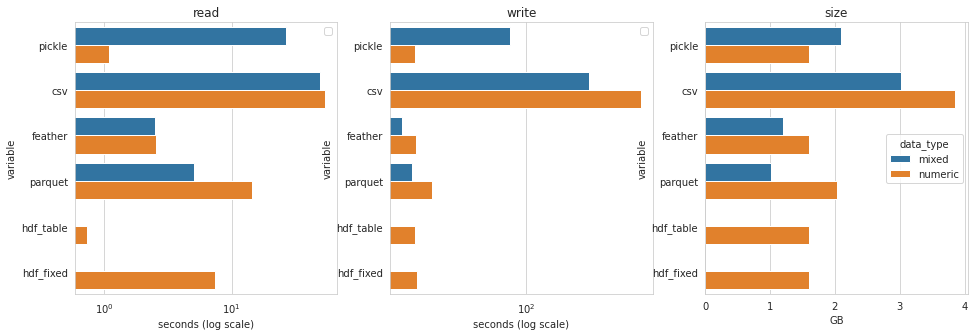

In [91]:
fig, axes = plt.subplots(ncols=3, figsize=(16,5))
for i, operation in enumerate(['read', 'write', 'size']):
  rw_tf = operation in ['read', 'write']
  sns.barplot(data=plot_df[plot_df['id'] == operation], x='value', y='variable', hue='data_type', ax=axes[i])
  axes[i].set_title(operation)
  if rw_tf:
    axes[i].set_xscale('log')
    axes[i].set_xlabel('seconds (log scale)')
    axes[i].legend([])
  else:
    axes[i].set_xlabel('GB')

fig.savefig('comparison.png', dpi=300)